In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('cleandata228.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41365 entries, 0 to 50364
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   41365 non-null  object 
 1   IDSTUD    41365 non-null  int64  
 2   ASBH02A   41365 non-null  object 
 3   ASBH02B   2694 non-null   float64
 4   ASBH03A   40470 non-null  object 
 5   ASBH04    26888 non-null  float64
 6   ASBH15A   22793 non-null  float64
 7   ASBH15B   20028 non-null  float64
 8   ASBH16    39643 non-null  float64
 9   ASBH17A   13507 non-null  float64
 10  ASBH17B   11257 non-null  float64
 11  ASBH18AA  25767 non-null  float64
 12  ASBH18AB  20840 non-null  float64
 13  ASBG01    29510 non-null  float64
 14  ASBG03    28438 non-null  float64
 15  ASDAGE    41360 non-null  float64
 16  ASBG10A   28638 non-null  float64
 17  ASBG10B   28451 non-null  float64
 18  ASBG10C   28329 non-null  float64
 19  ASBG10D   28259 non-null  float64
 20  ASBG10E   28291 non-null  fl

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

In [3]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

In [4]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4476
Egypt          7354
France         4768
Germany        2515
Iran           5840
Jordan         5801
Netherlands    2026
Sweden         2989
Turkey         5596
dtype: int64


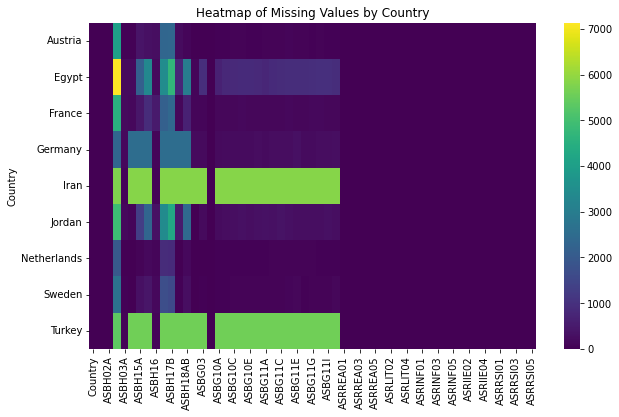

In [5]:
# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

In [6]:
identifier_columns = ['Country', 'IDSTUD']
demographic_info_columns = ['ASDAGE','ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03']
experience_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

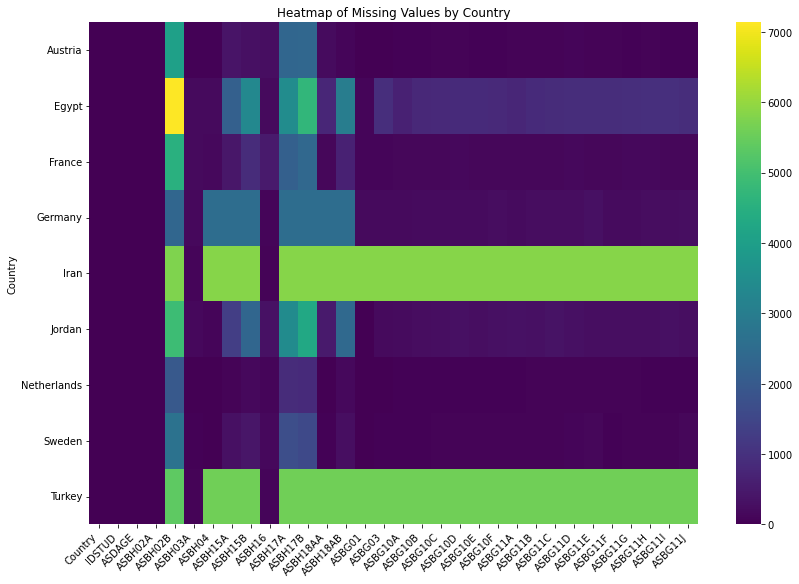

In [7]:
# Select the columns from the DataFrame
non_assessment_columns = identifier_columns + demographic_info_columns + experience_in_school_columns
df_selected = df[non_assessment_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

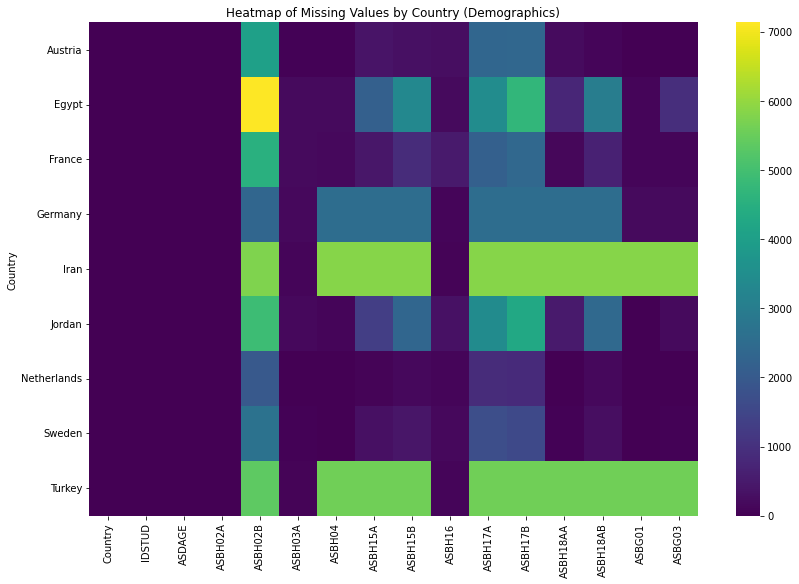

In [8]:
df_demographic = df[identifier_columns + demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

Now let's look at the experience in school columns in more detail.

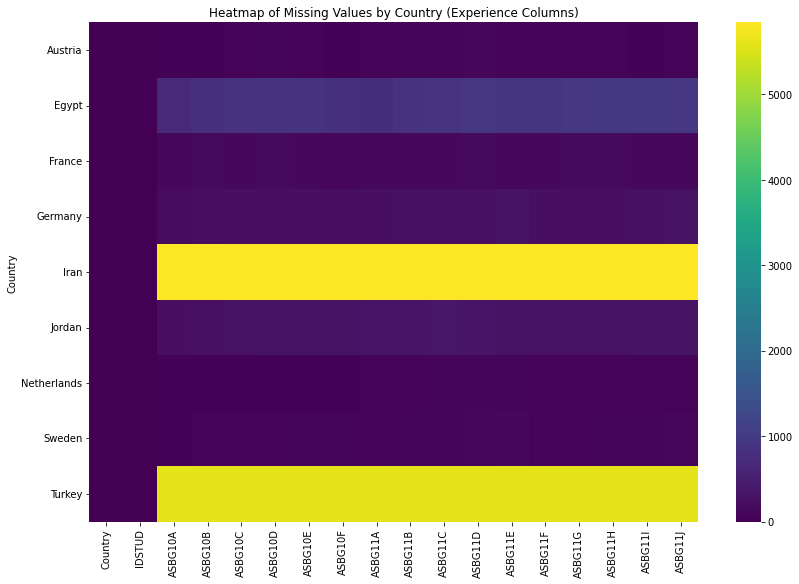

In [9]:
df_experience = df[identifier_columns + experience_in_school_columns]

# Perform the Groupby Operation
grouped_selection_experience = df_experience.groupby('Country')

# Aggregate with isnull
missing_values_experience = grouped_selection_experience.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
experienceheatmap = sns.heatmap(missing_values_experience, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Experience Columns)')
plt.show()

So both **Iran** and **Turkey** are missing all data on experiences of children in school, which is a shame. However it would be nice to compare childrens experiences across the other countries. **I want a pivot table like the ones above but with the experiences columns instead of literacy scores, etc.**

I want to explore these gaps in the Iran and Turkey data a little more. However, first I am going to look at **Egypt** in more detail. The total number of rows for **Egypt** is 7354. This is helpful to see how many values are missing across the columns.

In [10]:
missing_values_for_egypt = missing_values_demographic.loc['Egypt']
print(missing_values_for_egypt)

Country        0
IDSTUD         0
ASDAGE         1
ASBH02A        0
ASBH02B     7134
ASBH03A      179
ASBH04       194
ASBH15A     2157
ASBH15B     3320
ASBH16       180
ASBH17A     3448
ASBH17B     4704
ASBH18AA     766
ASBH18AB    2983
ASBG01        95
ASBG03       925
Name: Egypt, dtype: int64


Now I want to explore if the child's immigrant status in each country plays a role in data being missing. Let's first start by understanding how many children are in each group for each country.

In [11]:
# Apply value_counts() to the 'ASBH02A' column for each group
value_counts_per_group = grouped['ASBH02A'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Country         
Austria      Yes    4025
             No      451
Egypt        Yes    7071
             No      283
France       Yes    4526
             No      242
Germany      Yes    2317
             No      198
Iran         Yes    5720
             No      120
Jordan       Yes    4822
             No      979
Netherlands  Yes    1947
             No       79
Sweden       Yes    2681
             No      308
Turkey       Yes    5366
             No      230
Name: ASBH02A, dtype: int64


Now let's created a pivot table to understand how country and immigrant status affect the number of missing values. 

In [12]:
pivot_table_test = df_selected.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [13]:
print(pivot_table_test)

                     ASBG01  ASBG03  ASBG10A  ASBG10B  ASBG10C  ASBG10D  \
Country     ASBH02A                                                       
Austria     No            0       4        2        4        8        6   
            Yes           6      21       32       40       49       69   
Egypt       No            4      39       35       45       48       47   
            Yes          91     886      623      740      779      807   
France      No            6       7        6        9       10        8   
            Yes          90      96      110      128      119      139   
Germany     No           23      24       24       29       26       32   
            Yes         147     167      158      168      180      178   
Iran        No          120     120      120      120      120      120   
            Yes        5720    5720     5720     5720     5720     5720   
Jordan      No            2      21       31       40       47       55   
            Yes          

In [ ]:
column_order= ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [ ]:
pivot_table_test = pivot_table_test.reindex(column_order, axis=1)

In [ ]:
print(pivot_table_test)

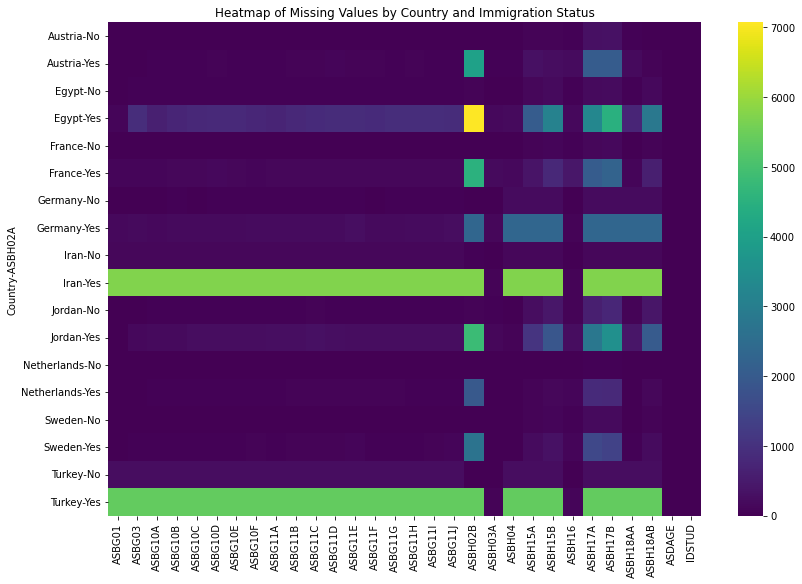

In [14]:
# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap_test = sns.heatmap(pivot_table_test, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
##heatmap_test.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country and Immigration Status')
plt.show()

In [ ]:
ASBH02A	GEN\CHILD BORN IN <COUNTRY>
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>
ASBH03A	GEN\LANGUAGE\<LANGUAGE OF TEST>
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME
ASBH15A	GEN\LVL OF EDUCATION\GUARDIAN A
ASBH15B	GEN\LVL OF EDUCATION\GUARDIAN B
ASBH16	GEN\LVL OF EDUCATION\CHILD
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B
ASBH18AA	GEN\LANGUAGE SPOKEN\<LANGUAGE OF TEST>\GUARDIAN A
ASBH18AB	GEN\LANGUAGE SPOKEN\<LANGUAGE OF TEST>\GUARDIAN B
ASBH18BA	GEN\LANGUAGE SPOKEN\<COUNTRY-SPECIFIC>\GUARDIAN A
ASBH18BB	GEN\LANGUAGE SPOKEN\<COUNTRY-SPECIFIC>\GUARDIAN B
ASBG01	GEN\SEX OF STUDENT
ASBG03	GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
ASBG10C	GEN\AGREE\BELONG AT SCHOOL
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL
ASBG11A	GEN\HOW OFTEN\MADE FUN OF
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME
ASBG11G	GEN\HOW OFTEN\MADE ME DO
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO
ASBG11J	GEN\HOW OFTEN\THREATENED ME"

There does not seem to be more gaps in the data for those who are not born in the countries where they have taken the test (ASBH02A == No). So that's good. 

We need to be careful as I'm not sure if the heatmap is showing the colours as percentage of possible values or as total values (Some countries will have less possible values than others)

In [15]:
# Calculate the total number of elements in each group
total_counts = df_selected.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

Pivot Table with Percentage of Missing Values:
                          ASBG01      ASBG03     ASBG10A     ASBG10B  \
Country     ASBH02A                                                   
Austria     No         0.000000    0.886918    0.443459    0.886918   
            Yes        0.149068    0.521739    0.795031    0.993789   
Egypt       No         1.413428   13.780919   12.367491   15.901060   
            Yes        1.286947   12.530052    8.810635   10.465281   
France      No         2.479339    2.892562    2.479339    3.719008   
            Yes        1.988511    2.121078    2.430402    2.828104   
Germany     No        11.616162   12.121212   12.121212   14.646465   
            Yes        6.344411    7.207596    6.819163    7.250755   
Iran        No       100.000000  100.000000  100.000000  100.000000   
            Yes      100.000000  100.000000  100.000000  100.000000   
Jordan      No         0.204290    2.145046    3.166496    4.085802   
            Yes        0.1451

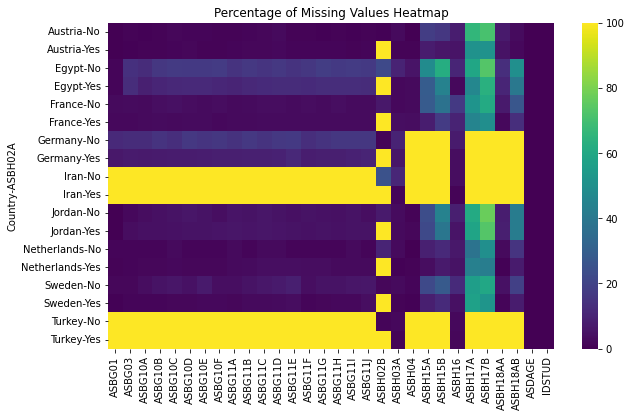

In [16]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

So **Iran** and **Turkey** have no experience data and **Germany** is also missing quite a few demographic columns.

"ASBH16" is hopes for child's level of education - most parents seem to have answered this.

Germany, Iran and Turkey have not answered any questions on how often lang of test spoken at home (4) parents' level of edu 15,  professions 17, level of language 18. Iran and Turkey have also not answered sex of child G01 or how often child says lang spoken at home G03.

## It would be interesting to compare child and parents' experience of lang of test spoken at home.

Where is age in all this??